In [214]:
import tensorflow as tf
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
except:
    IN_COLAB = False
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    if IN_COLAB: #If running in colab install tf 2.0
        !pip install tensorflow==2.0.0-alpha0 
        !pip install tfp-nightly==0.7.0-dev20190511
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0-alpha0  running in colab?:  True


In [215]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

plt.style.use('default') 
%matplotlib inline

tfd = tfp.distributions
print("TFB Version", tfp.__version__)
print("TF  Version",tf.__version__)

TFB Version 0.7.0-dev20190511
TF  Version 2.0.0-alpha0


In [0]:
#obs_data=np.array([1.,1.,1.])
obs_data=np.repeat(1,3)
#obs_data=np.repeat(1,500)
teta=np.arange(0.05,1,0.05)

In [275]:
### ML
est_teta_ml=sum(obs_data)/len(obs_data)
print(est_teta_ml)
sd_est_teta_ml=np.std(obs_data, ddof=1)
print(sd_est_teta_ml)


1.0
0.0


In [276]:
teta

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [0]:
dist = tfp.distributions.Bernoulli(probs=1)         

In [278]:
dist.prob(1.0)

<tf.Tensor: id=12323, shape=(), dtype=float32, numpy=nan>

In [0]:
#prior=1 #uniformdist
prior=1/len(teta) #uniformdist

In [280]:
np.prod(dist.prob(obs_data))#joint likelyhood

nan

In [281]:
np.prod(dist.prob(obs_data))*prior #unnormalized posterior

nan

In [0]:
RES=np.zeros((len(teta),5))
for i in range(0,len(teta)):
  dist = tfp.distributions.Bernoulli(probs=teta[i])   
  RES[i,0:4]=np.array((teta[i],np.prod(dist.prob(obs_data)),prior,np.prod(dist.prob(obs_data))*prior))

In [283]:
import pandas as pd
RES=pd.DataFrame(RES,columns=["teta","jointlik","prior","unnorm_post","post"])
RES

,teta,jointlik,prior,unnorm_post,post
0,0.05,0.000125,0.052632,0.000007,0.0
1,0.10,0.001000,0.052632,0.000053,0.0
2,0.15,0.003375,0.052632,0.000178,0.0
3,0.20,0.008000,0.052632,0.000421,0.0
4,0.25,0.015625,0.052632,0.000822,0.0
5,0.30,0.027000,0.052632,0.001421,0.0
6,0.35,0.042875,0.052632,0.002257,0.0
7,0.40,0.064000,0.052632,0.003368,0.0
8,0.45,0.091125,0.052632,0.004796,0.0
9,0.50,0.125000,0.052632,0.006579,0.0


In [0]:
RES["post"]=RES["unnorm_post"]/np.sum(RES["unnorm_post"])

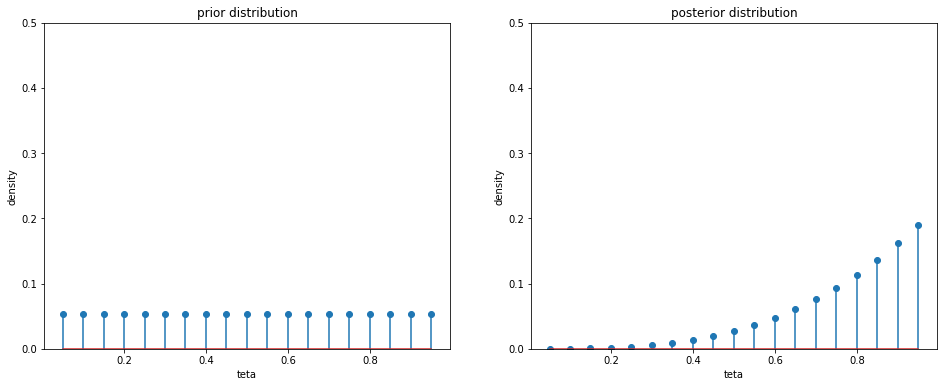

In [285]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem(RES["teta"],RES["prior"])
plt.xlabel("teta")
plt.ylabel("density")
plt.ylim([0,0.5])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem(RES["teta"],RES["post"])
plt.ylim([0,0.5])
plt.xlabel("teta")
plt.ylabel("density")
plt.title("posterior distribution")
plt.show()

In [286]:
np.sum((1-RES["teta"])*RES["post"]) # genährtes integral für teta-1


0.22068421052631568

In [287]:
np.sum((RES["teta"])*RES["post"]) # genährtes integral

0.7793157894736843

In [288]:
np.sum((1-RES["teta"])*RES["prior"]) # genährtes integral für teta-1

0.49999999999999994

In [289]:
np.sum((1-RES["teta"])*RES["prior"]) # genährtes integral für teta-1

0.49999999999999994

In [290]:
[np.sum((1-RES["teta"])*RES["post"]),np.sum((1-RES["teta"])*RES["post"])]

[0.22068421052631568, 0.22068421052631568]

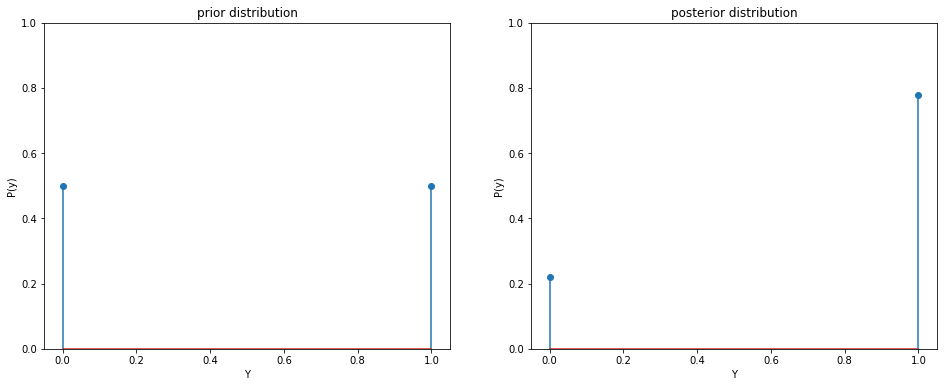

In [291]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.stem([0,1],[np.sum((1-RES["teta"])*RES["prior"]),np.sum((RES["teta"])*RES["prior"])])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.ylim([0,1])
plt.title("prior distribution")
plt.subplot(1,2,2)
plt.stem([0,1],[np.sum((1-RES["teta"])*RES["post"]),np.sum((RES["teta"])*RES["post"])])
plt.ylim([0,1])
plt.xlabel("Y")
plt.ylabel("P(y)")
plt.title("posterior distribution")
plt.show()